# Bagging vs Random Forest  
---

## 1. Common Ground (What Both Do)

Both **Bagging** and **Random Forest** are ensemble methods designed to reduce **variance** by combining multiple models.

They use:
- Bootstrap sampling (row sampling with replacement)
- Independent training of base models
- Aggregation of predictions

Goal:
$$
\text{Reduce variance without increasing bias too much}
$$

---

## 2. What is Bagging?

### Definition

Bagging (Bootstrap Aggregation) is a **general ensemble technique** where:
- Any algorithm can be a base estimator
- Each model trains on a bootstrap sample
- Predictions are aggregated

### Mathematical View

Given dataset:
$$
D = \{(x_i, y_i)\}_{i=1}^{N}
$$

Bootstrap samples:
$$
D^{(1)}, D^{(2)}, \dots, D^{(B)}
$$

Models:
$$
f_1(x), f_2(x), \dots, f_B(x)
$$

Final prediction:

**Classification**
$$
\hat{y} = \operatorname{mode}\{f_1(x), \dots, f_B(x)\}
$$

**Regression**
$$
\hat{y} = \frac{1}{B}\sum_{b=1}^{B} f_b(x)
$$

---

## 3. Base Estimator Difference (MOST IMPORTANT)

### Bagging
- Base estimator **can be ANY algorithm**
  - Decision Tree
  - KNN
  - SVM
  - Logistic Regression

```python
BaggingClassifier(base_estimator=ANY_MODEL)
```

### Random Forest
- Base estimator is **STRICTLY Decision Tree**
- No option to change it

```python
RandomForestClassifier()
```

$$
\text{Bagging is general, Random Forest is specialized}
$$

---

## 4. Why Bagging + Trees ≠ Random Forest

Using decision trees inside Bagging **does NOT automatically make it Random Forest**.

The key missing ingredient is **node-level feature sampling**.

---

## 5. Feature Sampling in Bagging (Tree-Level)

- Feature subset selected **once per tree**
- Same features used at **every split**

If total features = $d$, selected = $k$:

$$
\{x_{j_1}, x_{j_2}, \dots, x_{j_k}\}
$$

This set is **fixed for the entire tree**.

Effect:
- Trees remain correlated
- Variance reduction is limited

---

## 6. Feature Sampling in Random Forest (Node-Level)

In Random Forest:
- New feature subset chosen **at every split**

At node $t$:
$$
\text{Features}_t \sim \text{RandomSubset}(d, k)
$$

At node $t+1$:
$$
\text{Features}_{t+1} \sim \text{RandomSubset}(d, k)
$$

Effect:
- Trees are decorrelated
- Variance drops sharply
- Generalization improves

---

##7. Core Difference Table

| Aspect | Bagging | Random Forest |
|------|--------|---------------|
| Base estimator | Any algorithm | Decision Tree only |
| Feature sampling | Tree-level | Node-level |
| Randomness | Moderate | High |
| Tree correlation | High | Low |

---

## 8. Bias–Variance Explanation

Decision Trees:
- Low bias
- High variance

Random Forest keeps bias low and reduces variance.

Variance of ensemble:
$$
\operatorname{Var}\left(\frac{1}{B}\sum f_b\right)
=
\frac{1}{B^2}\sum \operatorname{Var}(f_b)
+
\frac{2}{B^2}\sum \operatorname{Cov}(f_i, f_j)
$$

Random Forest minimizes the covariance term.

---

## 9. Final Interview Answer

Bagging is a general ensemble method where any base estimator can be used and randomness mainly comes from bootstrap sampling.  
Random Forest is a specialized form of Bagging that uses only decision trees and introduces additional randomness by selecting a random subset of features at every node split, reducing correlation between trees and improving generalization.

---

## 10. One-Line Summary

$$
\boxed{\text{Random Forest = Bagging + Trees + Node-Level Feature Randomness}}
$$


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


In [3]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5)

In [4]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.311130,-0.865066,-0.035914,-2.836615,0.085903,0
1,-0.389264,1.281048,1.160630,1.730992,-0.373942,1
2,-1.164610,-1.134778,0.183516,0.583029,0.254002,1
3,-0.381413,-0.051047,0.796082,-0.833936,1.157979,0
4,0.761152,0.014622,1.086869,-2.148691,0.022028,1


In [5]:
bag = BaggingClassifier(max_features=2)

In [6]:
bag.fit(df.iloc[:,:5],df.iloc[:,-1])

BaggingClassifier(max_features=2)

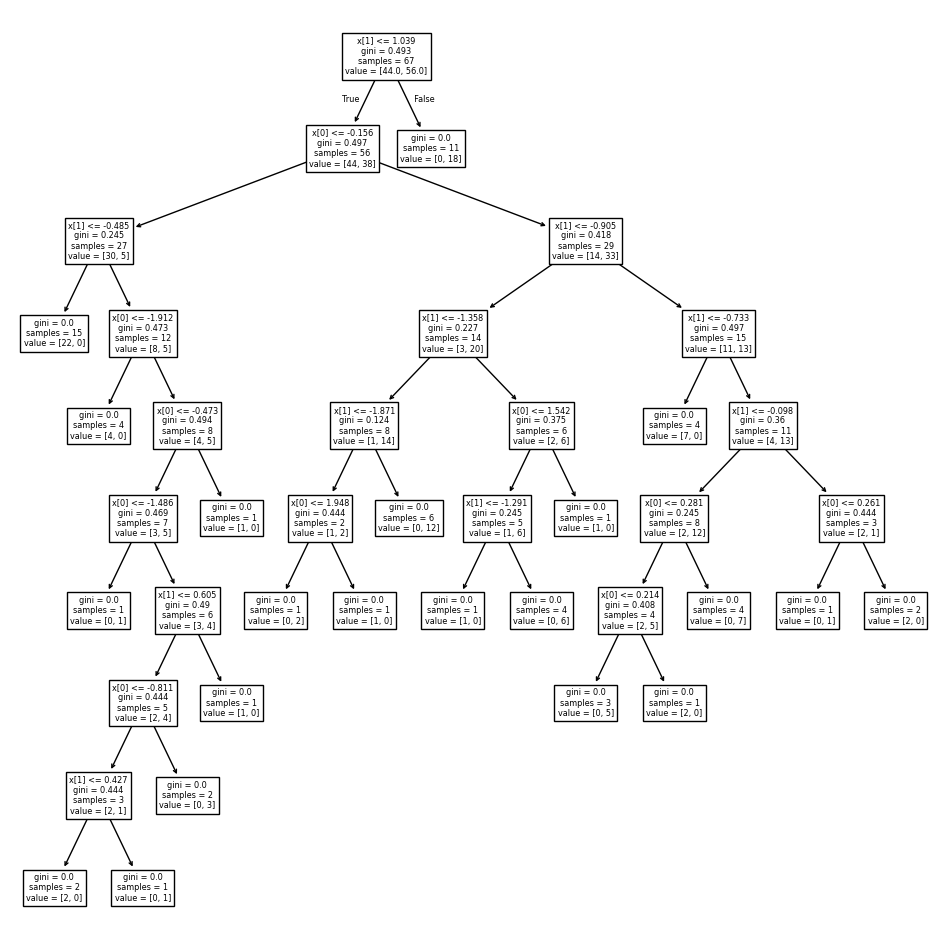

In [7]:
plt.figure(figsize=(12,12))
plot_tree(bag.estimators_[0])
plt.show()

In [8]:
rf = RandomForestClassifier(max_features=2)

In [9]:
rf.fit(df.iloc[:,:5],df.iloc[:,-1])

RandomForestClassifier(max_features=2)

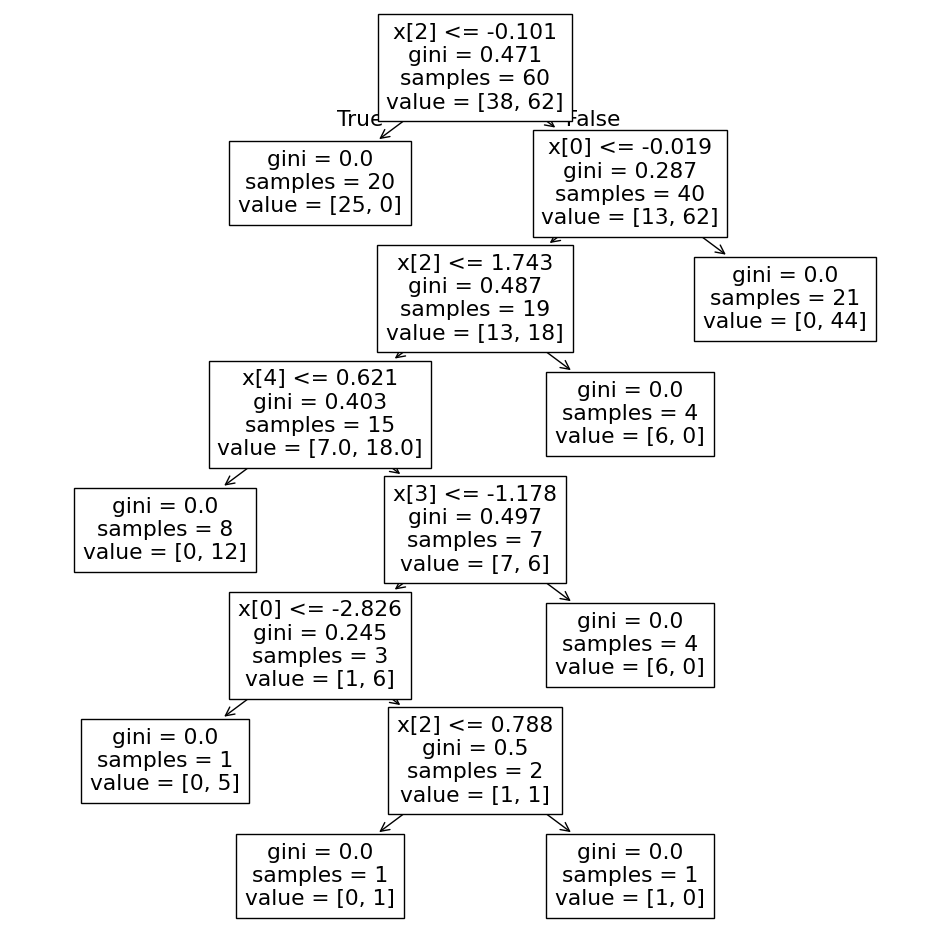

In [10]:
plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[4])
plt.show()